In [2]:
from collections import defaultdict
from typing import List, Dict, Set
import matplotlib.pyplot as plt

### Skew

In [14]:
def get_skew(genome: str) -> List[int]:
    ''' Returns an array with skew values (G - C) for genome'''

    G, C = 0, 0
    ans = [0]
    
    for item in genome:
        if item == "C":
            C += 1
        elif item == "G":
            G += 1
        
        ans.append(G - C)
        
    return ans    

[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]
True


Text(0, 0.5, 'Skew (G - C)')

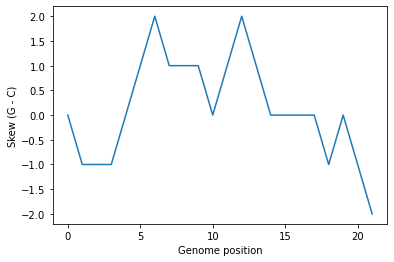

In [15]:
genome = "CATGGGCATCGGCCATACGCC"
right_ans = [0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]

ans = get_skew(genome)
print(ans)
print(ans == right_ans)

plt.plot([i for i in range(len(ans))], ans)
plt.xlabel("Genome position")
plt.ylabel("Skew (G - C)")

In [22]:
def get_skew_min(genome: str):
    ''' Returns genome's skew array, its minimum and argmin '''

    G, C = 0, 0
    skew_arr = [0]
    min_value = float("inf")
    min_ind = []
    
    for i, item in enumerate(genome):
        if item == "C":
            C += 1
        elif item == "G":
            G += 1
        
        diff = G - C
        skew_arr.append(diff)
        
        if diff < min_value:
            min_value = diff
            min_ind = [i + 1]
        elif diff == min_value:
            min_ind.append(i + 1)
            
        
    return skew_arr, min_value, min_ind

In [23]:
skew_arr, min_value, min_ind = get_skew_min(genome)
print(min_value, min_ind)

-2 [21]


In [27]:
def get_skew_max(genome: str):
    ''' Returns genome's skew array, its maximum and argmax '''
    
    G, C = 0, 0
    ans = [0]
    max_value = float("-inf")
    max_ind = []
    
    for i, item in enumerate(genome):
        if item == "C":
            C += 1
        elif item == "G":
            G += 1
        
        diff = G - C
        ans.append(diff)
        
        if diff > max_value:
            max_value = diff
            max_ind = [i + 1]
        elif diff == max_value:
            max_ind.append(i + 1)
            
        
    return ans, max_value, max_ind

In [28]:
skew_arr, max_value, max_ind = get_skew_max(genome)
print(max_value, max_ind)

2 [6, 12]


### Hamming Distance

In [29]:
def HammingDistance(s1: str, s2: str) -> int:
    ''' Takes in two k-mers and returns Hamming distance between them'''

    res = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            res += 1
    return res

In [30]:
s1 = "GGGCCGTTGGT"
s2 = "GGACCGTTGAC"

HammingDistance(s1, s2)

3

### Approximate Pattern Matching Problem

In [35]:
def ApproximatePatternMatching(pattern: str, text: str, d: int) -> List[int]:
    ''' Returns all starting positions where Pattern appears as a substring of Text 
            with at most d mismatches '''

    n = len(pattern)
    res = []
    
    for i in range(len(text) - len(pattern) + 1):
        if HammingDistance(pattern, text[i:i + n]) <= d:
            res.append(i)
            
    return res

In [36]:
pattern = "ATTCTGGA"
text = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
d = 3

ApproximatePatternMatching(pattern, text, d)
# right answer: [6, 7, 26, 27]

[6, 7, 26, 27]

In [40]:
def ApproximatePatternCount(pattern: str, text: str, d: int) -> int:
    ''' Returns number of occurrences of Pattern in Text with at most d mismatches '''
    
    n = len(pattern)
    count = 0
    
    for i in range(len(text) - len(pattern) + 1):
        if HammingDistance(pattern, text[i:i + n]) <= d:
            count += 1
            
    return count

In [41]:
text = "TTTAGAGCCTTCAGAGG"
pattern = "GAGG"
d = 2

ApproximatePatternCount(pattern, text, d)
# right answer = 4

4

In [47]:
def ImmediateNeighbors(pattern: str) -> Set[str]:
    ''' Returns immidiate neighbors (only 1 nucleotide differnce) for Pattern '''

    neighborhood = set()
    nucleotides = {"C", "G", "A", "T"}

    for i in range(len(pattern)):
        nucleotide_to_replace = pattern[i]
        for nucleotide in list(nucleotides - set(nucleotide_to_replace)):
            neighbor = pattern[:i] + nucleotide + pattern[i + 1:]
            neighborhood.add(neighbor)
    return neighborhood

In [48]:
ans = ImmediateNeighbors("AC")
print(ans)

right_ans = {'AA', 'AG', 'AT', 'CC', 'GC', 'TC'}
print(ans == right_ans)

{'CC', 'AA', 'AG', 'AT', 'GC', 'TC'}
True


In [51]:
def Neighbors(pattern: str, d: int) -> Set[str]:
    ''' Returns neighbors with at most d mismatches for Pattern '''
    
    if d == 0:
        return {pattern}
    if len(pattern) == 1: 
        return {'A', 'C', 'G', 'T'}
    
    neighborhood = set()
    
    SuffixNeighbors = Neighbors(pattern[1:], d)
    for s in SuffixNeighbors:
        if HammingDistance(pattern[1:], s) < d:
            for nucleotide in {'A', 'C', 'G', 'T'}:
                neighborhood.add(nucleotide + s)
        else:
            neighborhood.add(pattern[0] + s)
    return neighborhood

In [52]:
ans = Neighbors("CAA", 1)
print(ans)

right_ans = {'CAA', 'GAA', 'AAA', 'TAA', 'CCA', 'CGA', 'CTA', 'CAC', 'CAG', 'CAT'}
print(ans == right_ans)

{'CAT', 'AAA', 'CAC', 'CCA', 'CAA', 'TAA', 'CAG', 'CTA', 'GAA', 'CGA'}
True


In [53]:
# looking for == d (not <= d)
def NeighborsExact(pattern: str, d: int) -> Set[str]:
    ''' Returns neighbors with exactly d mismatches for Pattern '''
    
    if d == 0:
        return {pattern}
    if len(pattern) == 1: 
        return {'A', 'C', 'G', 'T'}
    
    neighborhood = set()
    
    SuffixNeighbors = Neighbors(pattern[1:], d)
    for s in SuffixNeighbors:
        hamming_distance_value = HammingDistance(pattern[1:], s)
        if hamming_distance_value == d - 1:
            for nucleotide in list({'A', 'C', 'G', 'T'} - {pattern[0]}):
                neighborhood.add(nucleotide + s)
        elif hamming_distance_value == d:
            neighborhood.add(pattern[0] + s)
    return neighborhood

In [54]:
ans = NeighborsExact("CAA", 1)
print(ans)

# like previous but without CAA because HammingDistance('CAA', 'CAA') = 0 (should be equal to 1 exact)
right_ans = {'GAA', 'AAA', 'TAA', 'CCA', 'CGA', 'CTA', 'CAC', 'CAG', 'CAT'}
print(ans == right_ans)

{'CAT', 'AAA', 'CAC', 'CCA', 'TAA', 'CAG', 'CTA', 'GAA', 'CGA'}
True


In [58]:
def FrequentWordsWithMismatches(text: str, k: int, d: int) -> List[str]:
    ''' Returns all most frequent k-mers with up to d mismatches in Text '''

    patterns = []
    freqMap = defaultdict(int)
    n = len(text)
    
    for i in range(n - k + 1):
        pattern = text[i:i + k]
        neighborhood = Neighbors(pattern, d)
        for neighbor in neighborhood:
            freqMap[neighbor] += 1

    m = max(freqMap.values())
    for pattern, freq in freqMap.items():
        if freqMap[pattern] == m:
            patterns.append(pattern)
    return patterns

In [56]:
FrequentWordsWithMismatches('CAAA', 2, 1)

['CA', 'GA', 'AA', 'TA']

In [57]:
text = "TCTCTATGTAATACGATATAATATATATATCTCATAATATCTCTCTCATAGTATATGTACGATGTATCTCATACGATTCTCCGATATATATTCTCTCTCGTAGTATATTATGTATATGTAATAATACGATCGATGTAGTATCTCTCTCATATATGTATCTCGTAGTAGTAGTATATTCTCTCTCGTACGATGTACGATGTATATGTAATACGATTCTCGTACGATTATGTACGATGTATCTCGTATATCGATGTATATATACGATTCTCTCTCTCTCCGATGTATCTCGTAGTATATATAATATCTCTATTCTCATATATCGATTCTCTCTCATA"
k, d = 5, 3

ans = FrequentWordsWithMismatches(text, k, d)
print(ans)

right_ans = ['TTTTT']
print(ans == right_ans)

['TTTTT']
True


In [ ]:
def FrequentWordsWithMismatchesAndRC(text: str, k: int, d: int) -> List[str]:
    ''' Returns all most frequent k-mers and its reverse complements with up to d mismatches in Text '''

    patterns = []
    freqMap = defaultdict(int)
    n = len(text)
    
    for i in range(n - k + 1):
        pattern = text[i:i + k]
        neighborhood = Neighbors(pattern, d)
        for neighbor in neighborhood:
            freqMap[neighbor] += 1
        
        pattern_rc = get_compliment(pattern)
        neighborhood_rc = Neighbors(pattern_rc, d)
        for neighbor in neighborhood_rc:
            freqMap[neighbor] += 1

    m = max(freqMap.values())
    for pattern, freq in freqMap.items():
        if freqMap[pattern] == m:
            patterns.append(pattern)
    return patterns

In [ ]:
ans = FrequentWordsWithMismatchesAndRC("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1)
print(ans)

right_ans = {'ATGT', 'ACAT'}
print(right_ans == set(ans))